In [205]:
import pandas as pd

# Load the dataset
weather_df = pd.read_csv('weather.csv')


In [206]:
# Display the first few rows of the dataset
print(weather_df.head())


       STATION                              NAME        DATE  ACMH   ACSH  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  1970-01-01  80.0   90.0   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  1970-01-02  30.0   20.0   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  1970-01-03  80.0  100.0   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  1970-01-04  10.0   20.0   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US  1970-01-05  30.0   10.0   

   AWND  FMTM  PGTM  PRCP  SNOW  ...  WT11  WT13  WT14  WT15  WT16  WT17  \
0   NaN   NaN   NaN  0.00   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN  0.00   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN  0.02   0.0  ...   NaN   NaN   NaN   NaN   1.0   NaN   
3   NaN   NaN   NaN  0.00   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN  0.00   0.0  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   WT18  WT21  WT22  WV01  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   Na

In [207]:
# Display the data types of each column
print(weather_df.dtypes)

STATION     object
NAME        object
DATE        object
ACMH       float64
ACSH       float64
AWND       float64
FMTM       float64
PGTM       float64
PRCP       float64
SNOW       float64
SNWD       float64
TAVG       float64
TMAX         int64
TMIN         int64
TSUN       float64
WDF1       float64
WDF2       float64
WDF5       float64
WDFG       float64
WDFM       float64
WESD       float64
WSF1       float64
WSF2       float64
WSF5       float64
WSFG       float64
WSFM       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT21       float64
WT22       float64
WV01       float64
dtype: object


In [208]:
# Check the shape of the dataset
print(f'Dataset contains {weather_df.shape[0]} rows and {weather_df.shape[1]} columns')


Dataset contains 19287 rows and 45 columns


In [209]:
# Check for missing values
missing_values = weather_df.isnull().sum()
print(missing_values)

STATION        0
NAME           0
DATE           0
ACMH        9672
ACSH        9671
AWND        5116
FMTM        9163
PGTM        7018
PRCP           0
SNOW           0
SNWD           2
TAVG       13123
TMAX           0
TMIN           0
TSUN       19256
WDF1        9676
WDF2        9618
WDF5        9701
WDFG       14166
WDFM       19286
WESD       13216
WSF1        9673
WSF2        9618
WSF5        9702
WSFG       11824
WSFM       19286
WT01       12155
WT02       18034
WT03       18000
WT04       18951
WT05       18923
WT06       19106
WT07       19179
WT08       15371
WT09       19147
WT11       19273
WT13       17102
WT14       18400
WT15       19245
WT16       12710
WT17       19227
WT18       18120
WT21       19282
WT22       19238
WV01       19286
dtype: int64


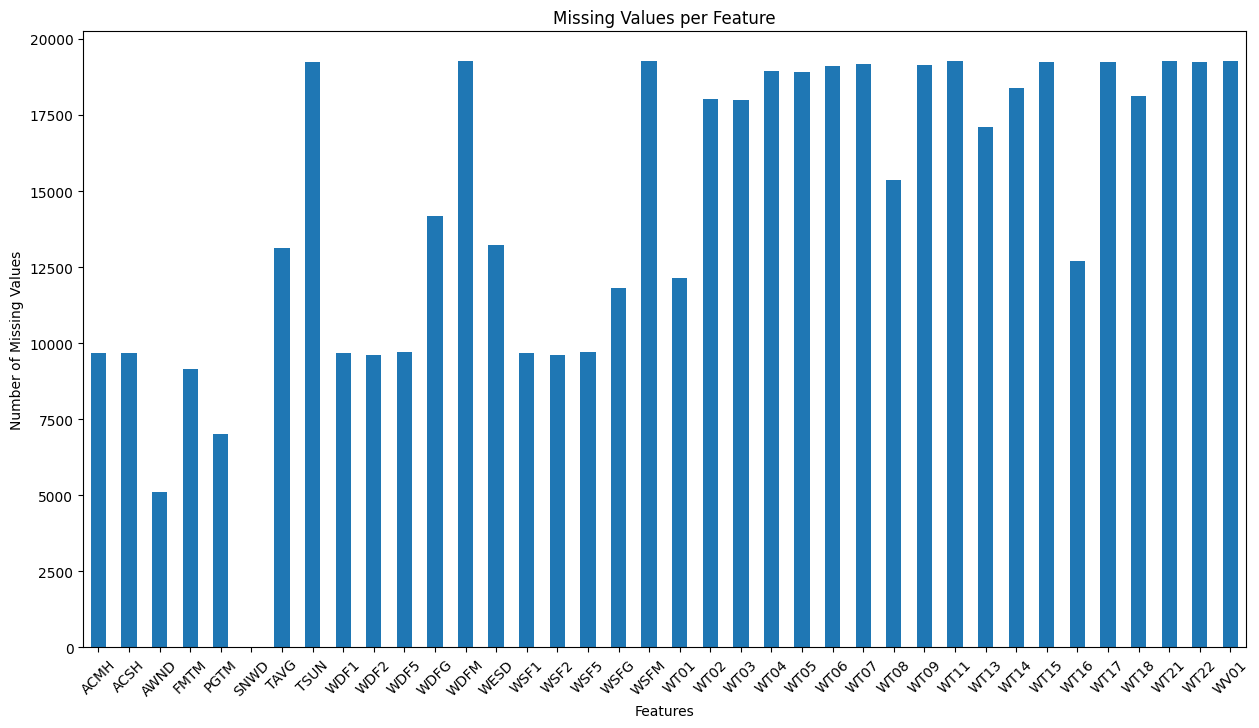

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weather_df is your DataFrame
# Calculate the number of missing values for each column
missing_values = weather_df.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plotting the missing values
plt.figure(figsize=(15, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


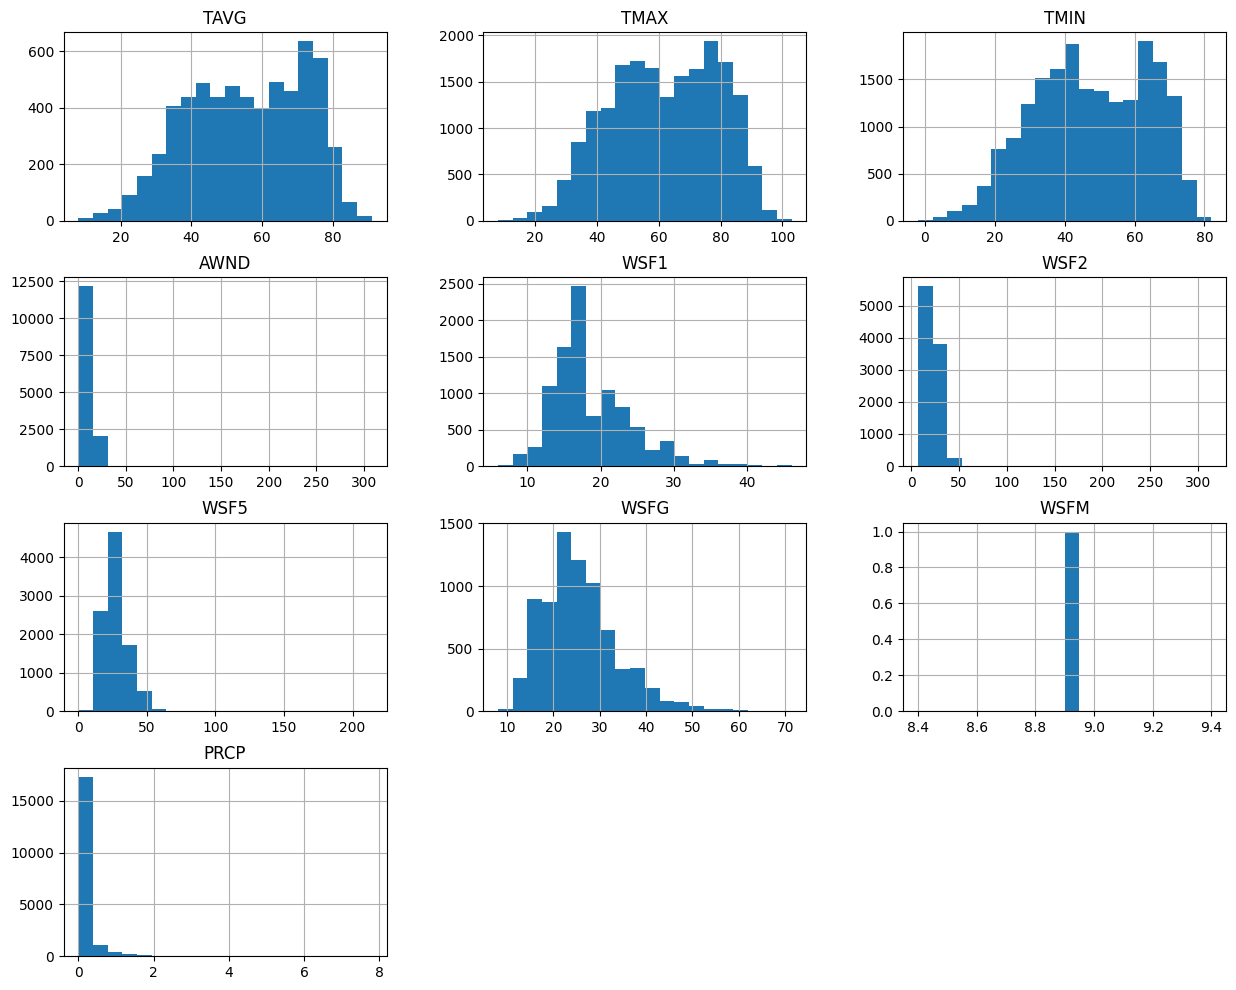

In [211]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weather_df is your DataFrame
key_features = ['TAVG', 'TMAX', 'TMIN', 'AWND', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'PRCP']

# Creating histograms for the selected key features
weather_df[key_features].hist(figsize=(15, 12), bins=20)
plt.show()


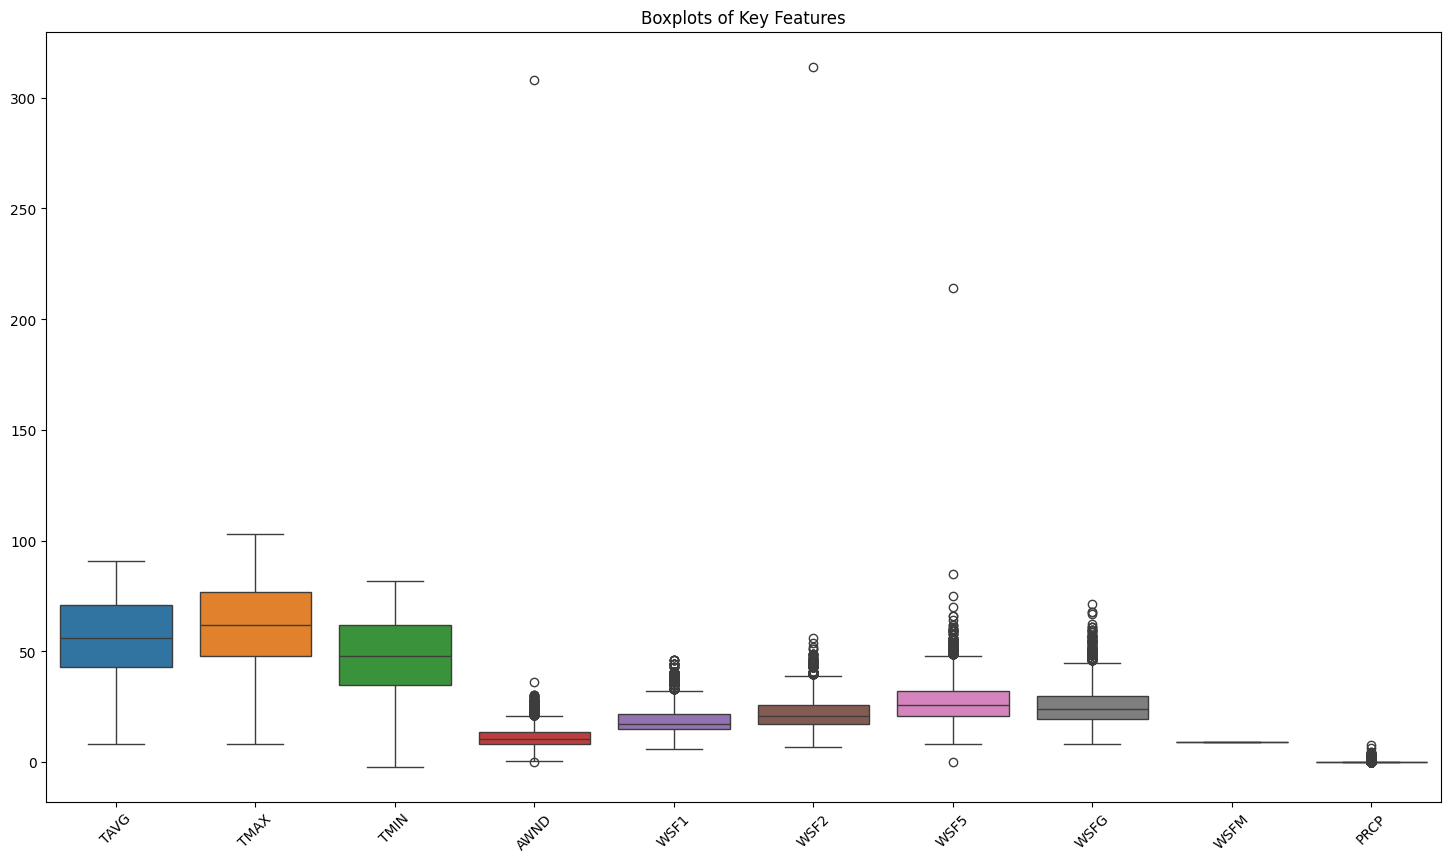

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming weather_df is your DataFrame
key_features = ['TAVG', 'TMAX', 'TMIN', 'AWND', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'PRCP']

# Creating boxplots for the selected key features
plt.figure(figsize=(18, 10))
sns.boxplot(data=weather_df[key_features])
plt.title('Boxplots of Key Features')
plt.xticks(rotation=45)
plt.show()


In [213]:
import pandas as pd

# Assuming weather_df is your DataFrame and 'DATE' is the column for date
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# Extracting additional time-related features
weather_df['dayofweek'] = weather_df['DATE'].dt.dayofweek
weather_df['is_weekend'] = weather_df['dayofweek'].isin([5, 6]).astype(int)

# Example: One-hot encoding for categorical variables (if any)
# Suppose we have a 'WT01' categorical feature representing weather condition
# We will encode all WT* columns as they might represent different weather conditions
wt_columns = [col for col in weather_df.columns if col.startswith('WT')]
weather_df = pd.get_dummies(weather_df, columns=wt_columns, drop_first=True)

# Filling missing values with median for numerical columns
numerical_columns = ['TAVG', 'TMAX', 'TMIN', 'AWND', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'PRCP']
for column in numerical_columns:
    weather_df[column].fillna(weather_df[column].median(), inplace=True)

# Display the first few rows after feature engineering
print(weather_df.head())


       STATION                              NAME       DATE  ACMH   ACSH  \
0  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 1970-01-01  80.0   90.0   
1  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 1970-01-02  30.0   20.0   
2  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 1970-01-03  80.0  100.0   
3  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 1970-01-04  10.0   20.0   
4  USW00094789  JFK INTERNATIONAL AIRPORT, NY US 1970-01-05  30.0   10.0   

    AWND  FMTM  PGTM  PRCP  SNOW  ...  WDFM  WESD  WSF1  WSF2  WSF5  WSFG  \
0  10.51   NaN   NaN  0.00   0.0  ...   NaN   NaN  14.1  21.0  25.9  24.2   
1  10.51   NaN   NaN  0.00   0.0  ...   NaN   NaN  17.9  21.0  25.9  24.2   
2  10.51   NaN   NaN  0.02   0.0  ...   NaN   NaN  17.0  21.0  25.9  24.2   
3  10.51   NaN   NaN  0.00   0.0  ...   NaN   NaN  17.9  21.0  25.9  24.2   
4  10.51   NaN   NaN  0.00   0.0  ...   NaN   NaN  19.9  21.0  25.9  24.2   

   WSFM  WV01  dayofweek  is_weekend  
0   8.9   NaN          3           0  
1 

In [219]:
# Import the Ridge regression model from the scikit-learn library
from sklearn.linear_model import Ridge

# Instantiate a Ridge regression model object with a regularization parameter (alpha) set to 0.1
rr = Ridge(alpha=0.1)


In [218]:
def backtest(weather, model, predictors, start=3650, step=90):
    # Initialize an empty list to store predictions from each iteration
    all_predictions = []
    
    # Iterate through the weather data starting from the specified start index,
    # incrementing by the specified step size
    for i in range(start, weather.shape[0], step):
        # Split the data into training and testing sets based on the current index
        train = weather.iloc[:i, :]  # Training data from the beginning up to i
        test = weather.iloc[i:(i+step), :]  # Testing data from i to i + step
        
        # Fit the model using the specified predictors on the training data
        model.fit(train[predictors], train["target"])
        
        # Make predictions using the trained model on the testing data
        preds = model.predict(test[predictors])
        
        # Convert the predictions into a Pandas Series with the same index as the testing data
        preds = pd.Series(preds, index=test.index)
        
        # Combine the actual target values and the predictions into a DataFrame
        combined = pd.concat([test["target"], preds], axis=1)
        
        # Rename the columns of the combined DataFrame
        combined.columns = ["actual", "prediction"]
        
        # Calculate the absolute difference between the actual and predicted values
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        # Append the combined DataFrame to the list of all predictions
        all_predictions.append(combined)
    
    # Concatenate all the individual prediction DataFrames into a single DataFrame
    return pd.concat(all_predictions)


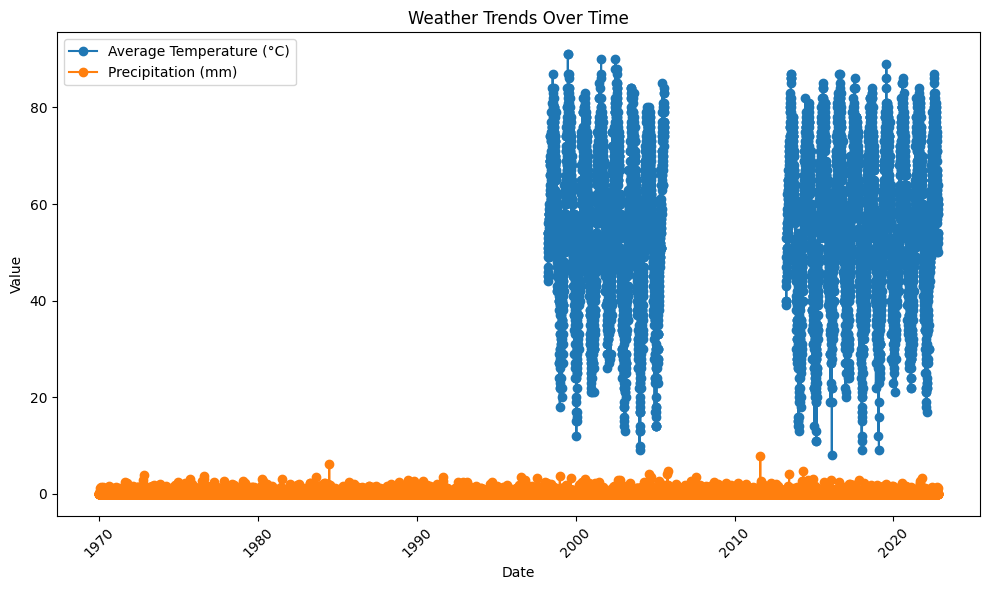

In [216]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the weather dataset
weather_df = pd.read_csv('weather.csv')

# Convert 'DATE' column to datetime format
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# Plotting temperature and precipitation over time
plt.figure(figsize=(10, 6))
plt.plot(weather_df['DATE'], weather_df['TAVG'], marker='o', linestyle='-', label='Average Temperature (°C)')
plt.plot(weather_df['DATE'], weather_df['PRCP'], marker='o', linestyle='-', label='Precipitation (mm)')
plt.title('Weather Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
